In [1]:
# Copyright 2024 Keysight Technologies Inc.

In [2]:
import trueq as tq
from time import sleep

# initialize a noisy simulator
sim = tq.Simulator().add_stochastic_pauli(px=0.02)

# generate 90 SRB circuits
circuits = tq.make_srb([[0], [1, 2]], [4, 32, 64], 30)

In [3]:
batches = circuits.batch(30)

# execute each batch on the simulator
for batch in batches:
    print(f"executing batch {batch.keys().batch.pop()} with {len(batch)} circuits")
    sim.run(batch)
    sleep(1)

# display all unique batches of SRB circuits
circuits.keys().batch

executing batch 0 with 30 circuits


executing batch 1 with 30 circuits


executing batch 2 with 30 circuits


{0, 1, 2}

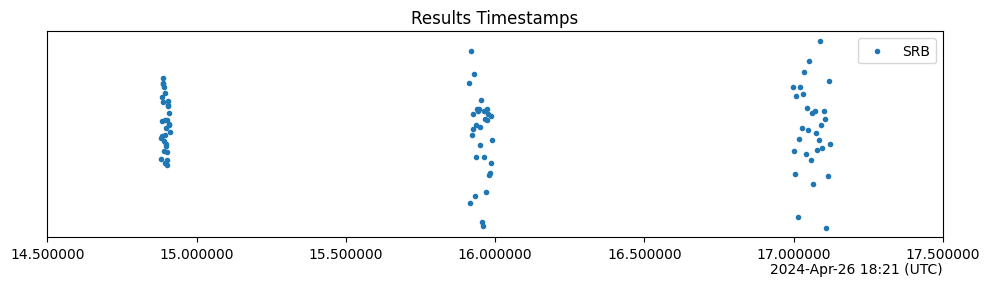

In [4]:
# plot the timestamps of results for all circuits
circuits.plot.timestamps()

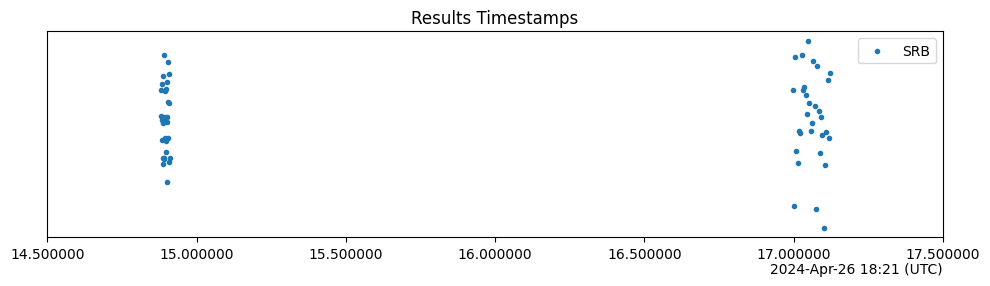

In [5]:
# plot the timestamps of results for batches 0 and 2
circuits.subset(batch={0, 2}).plot.timestamps()

In [6]:
# generate 90 SRB circuits
circuits = tq.make_srb([[0], [1, 2]], [4, 32, 64], 30)

# generate 2 RCAL circuits
rcal_circuits = tq.make_rcal([0, 1, 2])

# group the circuits into three batches with 30 SRB and 2 RCAL circuits per batch
batches = circuits.batch(32, extra_circuits=rcal_circuits)

# execute each batch on the simulator
for batch in batches:
    sim.run(batch)

# verify the contents of each batch
for batch in circuits.keys().batch:
    srb = circuits.subset(batch=batch, protocol="SRB")
    rcal = circuits.subset(batch=batch, protocol="RCAL")
    print(f"batch {batch} contains {len(srb)} SRB and {len(rcal)} RCAL circuits")

batch 0 contains 30 SRB and 2 RCAL circuits
batch 1 contains 30 SRB and 2 RCAL circuits
batch 2 contains 30 SRB and 2 RCAL circuits
